## 1 Модули

1.1. (уровень сложности: простейший)

Напишите код, состоящий из двух модулей, для получения следующего сообщения об ошибке:

AttributeError: partially initialized module '...' has no attribute '...' (most likely due to a circular import)

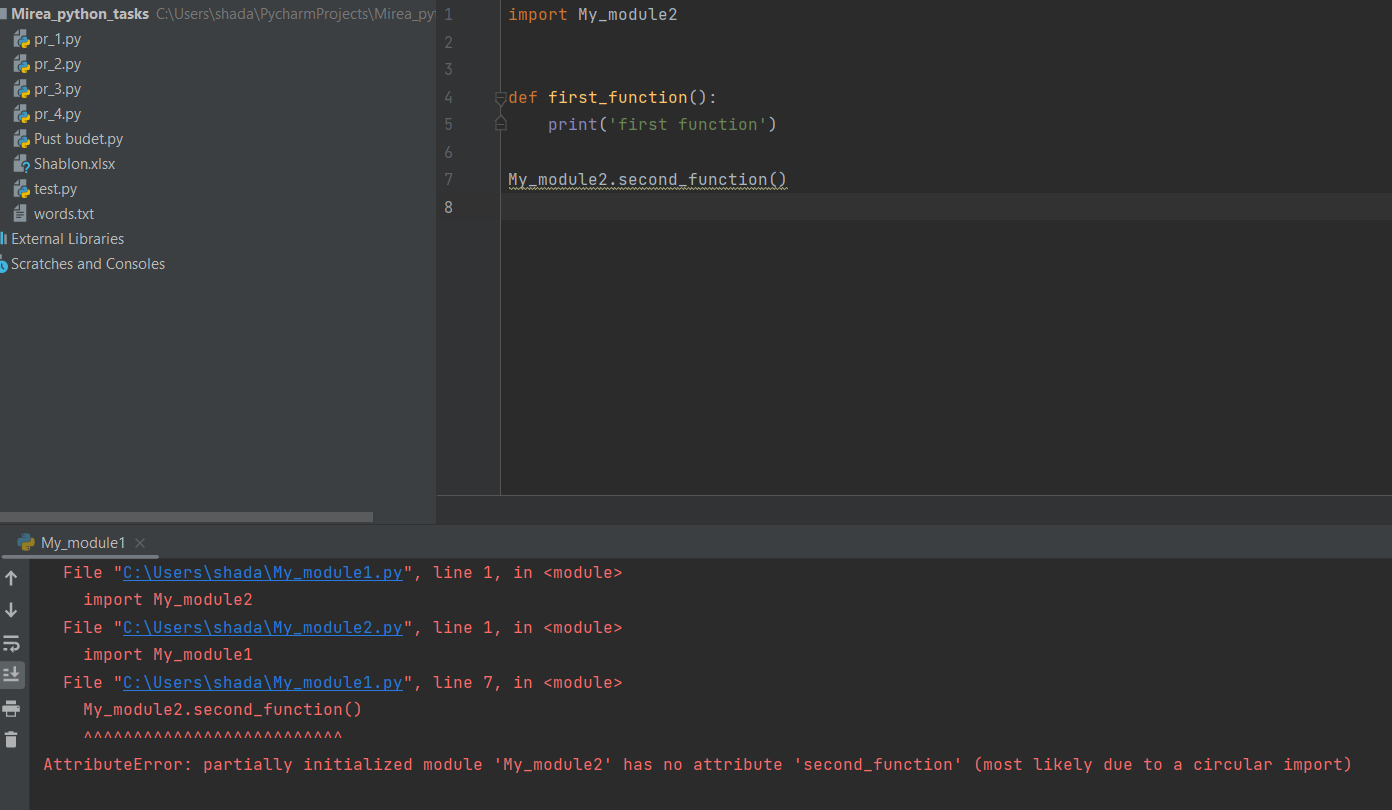

In [ ]:
import My_module1  # noqa: F401


Module worked


1.2. (уровень сложности: простейший)

Как вы думаете, модуль загружается один раз или же загружается каждый раз при очередном импорте? Докажите правильность вашей гипотезы примером кода.

Один раз, если бы загружался два раза, то и код вполнялся бы два раза

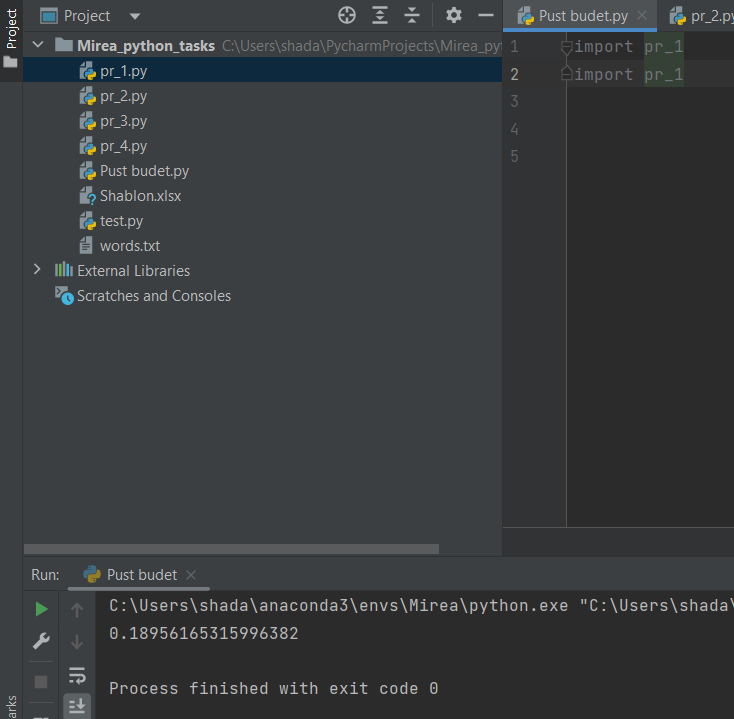

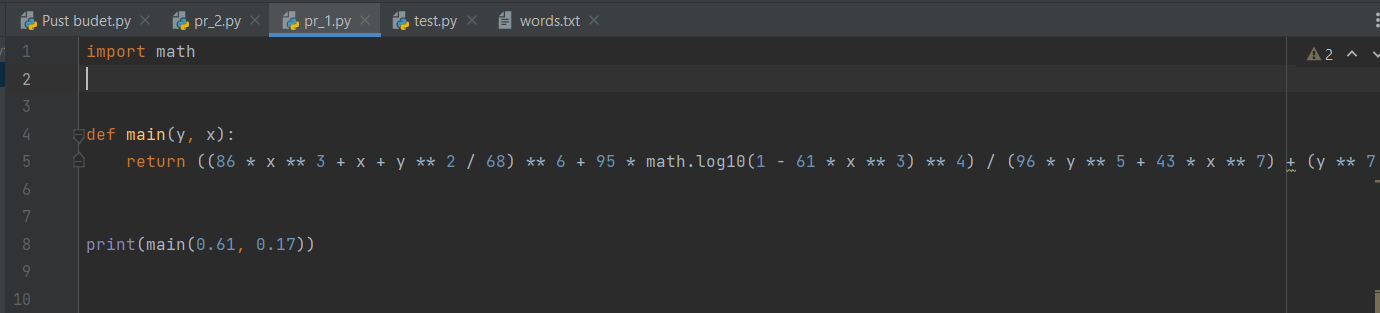

1.3. (уровень сложности: простейший)

Предположим, мы хотим изменить значение глобальной переменной модуля, но так, чтобы новое значение отразилось на всех пользователях этого модуля. К чему приведет следующий код? Что можно предложить взамен?

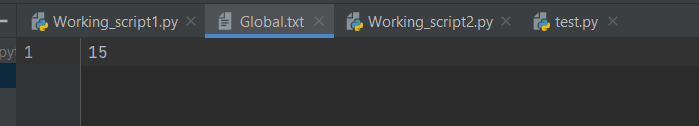

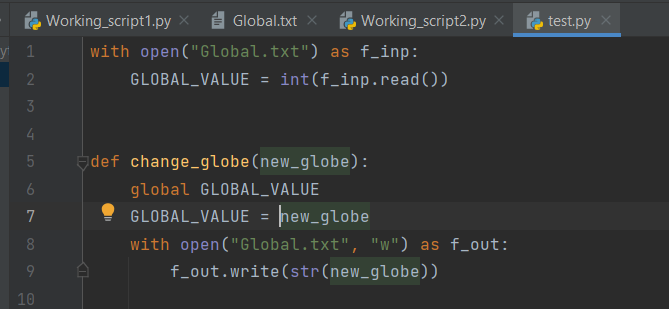

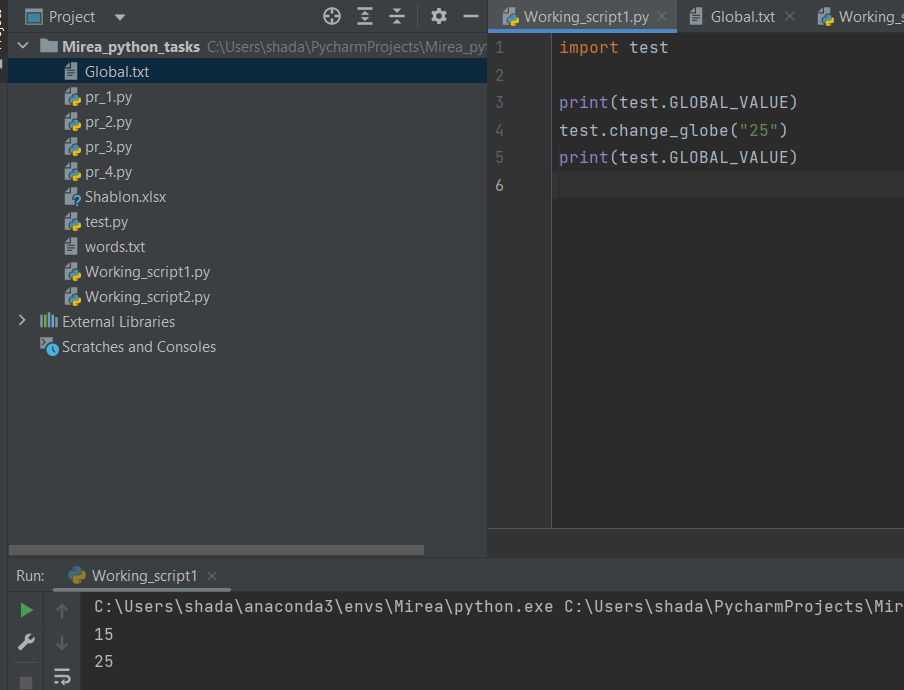

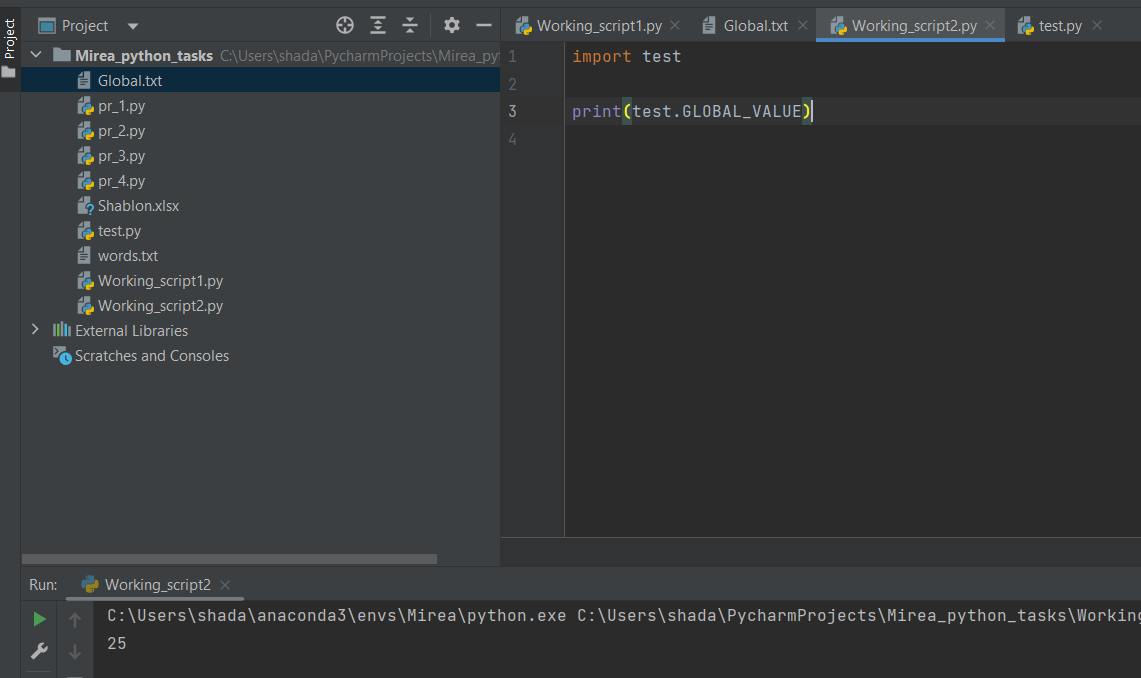

1.4. (уровень сложности: простейший)

Неконтролируемый импорт с помощью *, как известно, в Питоне не поощряется. Попробуйте сделать его контролируемым со стороны модуля. Использование звездочки не должно приводить к импорту всех глобальных имен вашего модуля.

Можно добавить единичное подчёркивание к началу названия метода/переменной и тогда он импортироваться не будет

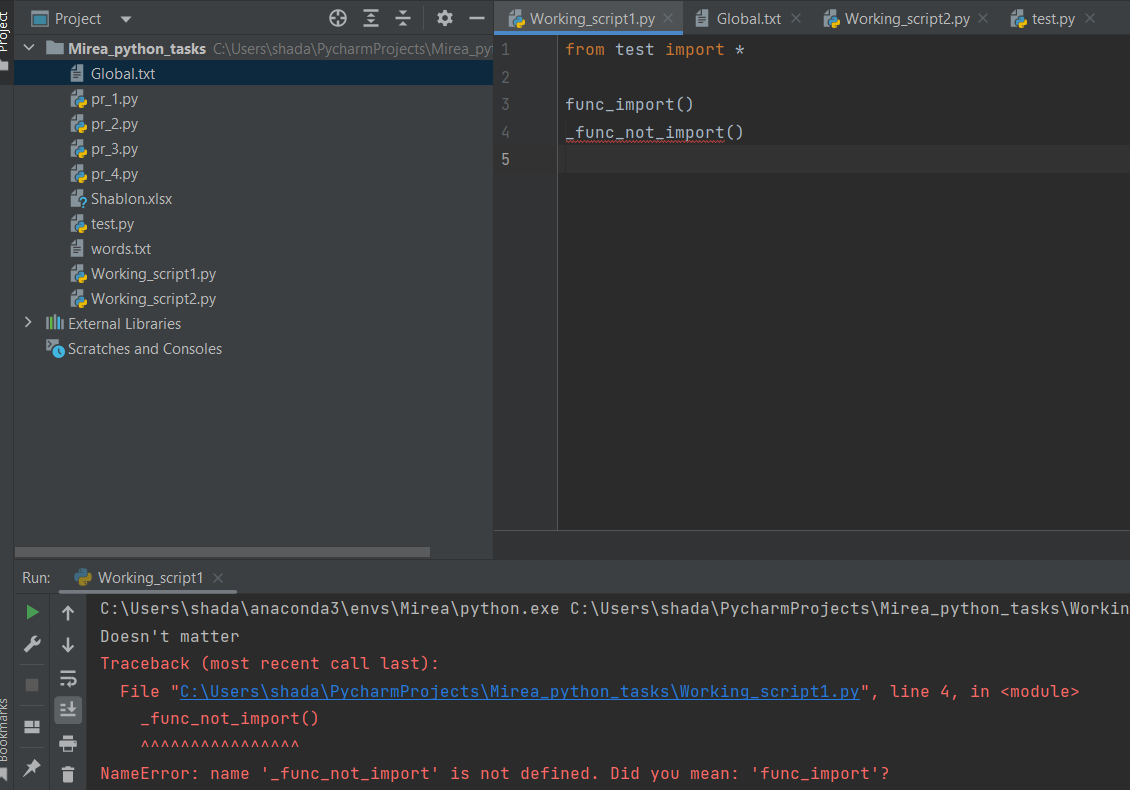

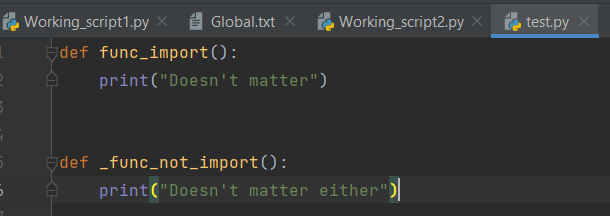

1.5. (уровень сложности: низкий)

Напишите функцию load_config(filename) для загрузки скрипта на Питоне в виде программируемого конфигурационного формата. Приведите плюсы и минусы подходов с использованием импорта и прямого выполнения кода.

In [ ]:
def load_config(filename):
    with open(filename, "r") as file:
        config_code = file.read()
    config_globals = {}
    exec(config_code, config_globals)


load_config("My_module1.py")

Module worked


**Импорт:**

Плюсы:
- Более безопасный подход, так как импортируемый модуль может быть предварительно проверен перед использованием.
- Четкое разделение кода: импортированный модуль остается отдельным пространством имен.

Минусы:
- Требует явного указания того, что именно будет импортировано.
- Может потребовать дополнительной настройки для корректной работы.

**Прямое выполнение кода:**

Плюсы:
- Простота использования: нет необходимости явно импортировать модуль.
- Гибкость: можно динамически создавать и выполнять конфигурационные скрипты.

Минусы:
- Безопасность: выполнение произвольного кода может представлять угрозу без должной проверки.
- Сложность отладки: ошибка в конфигурационном скрипте может быть сложнее отследить и исправить.

1.6. (уровень сложности: средний)

Создайте учебный пакет, состоящий из нескольких модулей и JSON-файла. Получите дистрибутив, готовый для установки с помощью pip. Проверьте результат установки в виртуальном окружении.

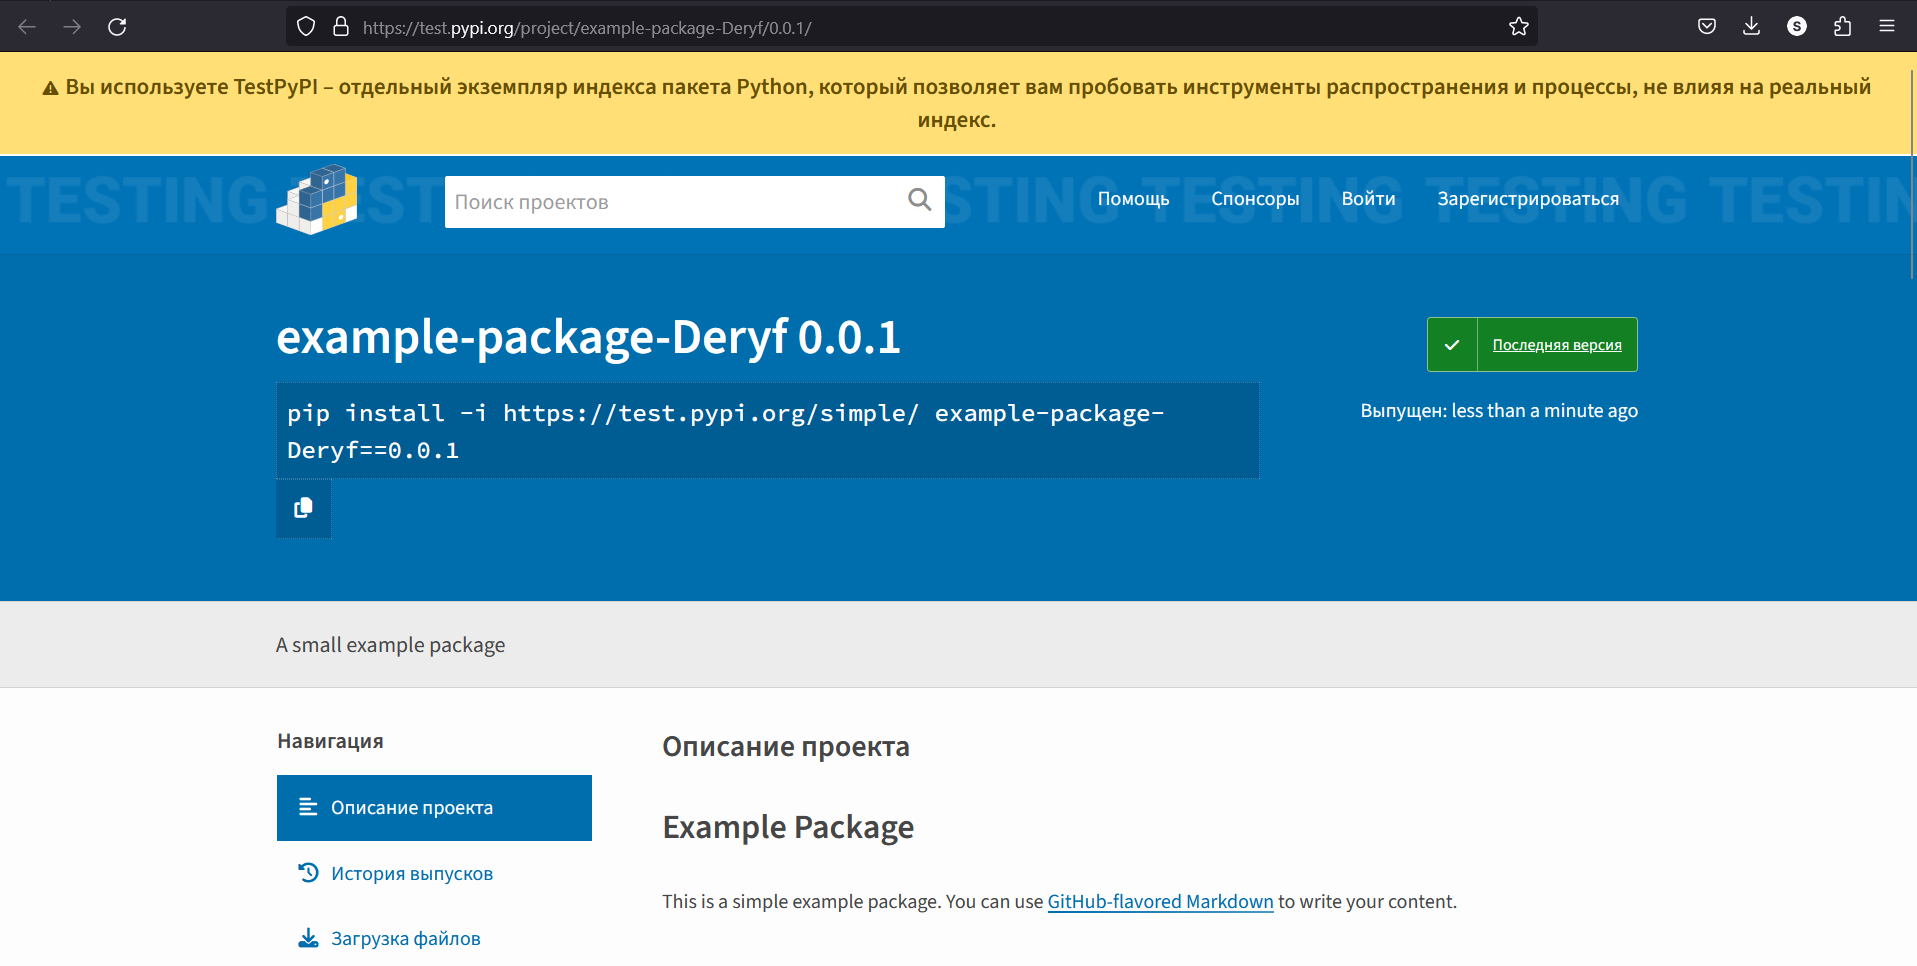


## 2 Процедурная графика

2.1. (уровень сложности: средний)

Создайте генератор случайных спрайтов 5x5 пикселей. Используйте свойство симметрии. Вывод реализуйте с помощью функции imshow.

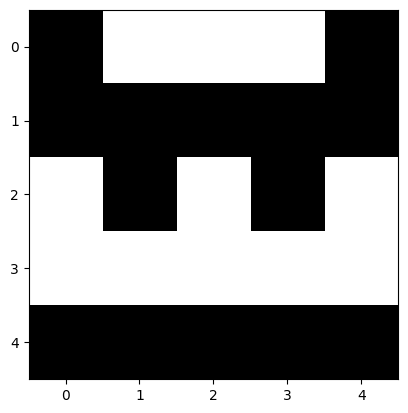

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


def create_sprite():
    sprite = np.zeros((5, 5))
    for i in range(5):
        for j in range(3):
            sprite[i, j] = random.choice([0, 1])
    sprite[:, 4] = sprite[:, 0]
    sprite[:, 3] = sprite[:, 1]
    return sprite


plt.imshow(create_sprite(), cmap="binary")

plt.show()

2.2. (уровень сложности: средний)

Создайте генератор карт спрайтов. Пример работы этого генератора показан ниже.

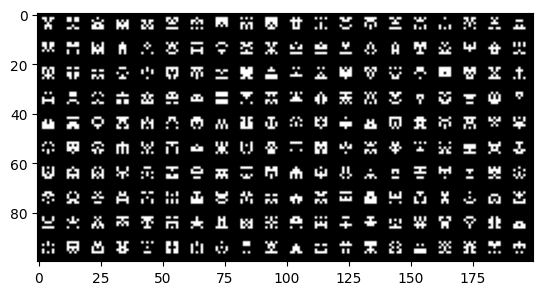

In [ ]:
import matplotlib.pyplot as plt


def create_sprite():
    sprite = np.zeros((5, 5))
    for i in range(5):
        for j in range(3):
            sprite[i, j] = random.choice([0, 1])
    sprite[:, 3] = sprite[:, 1]
    sprite[:, 4] = sprite[:, 0]
    return sprite


def create_map():
    map = np.zeros((100, 200))
    for i in range(2, 93, 10):
        for j in range(2, 193, 10):
            sprite = create_sprite()
            map[i : i + 5, j : j + 5] += sprite
    return map


plt.imshow(create_map(), cmap="binary_r")

plt.show()

2.3. (уровень сложности: высокий)

Реализуйте генератор случайных спрайтов NxM. Используйте различные свойства симметрии. Добавьте цвета.

Пример работы этого генератора показан ниже.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


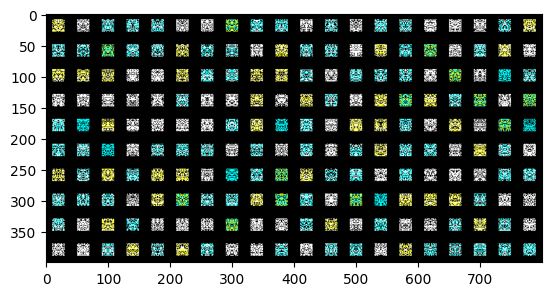

In [ ]:
from math import ceil, floor


palette = [
    (0, 135, 81),
    (0, 228, 54),
    (255, 119, 168),
    (255, 163, 0),
    (255, 236, 39),
    (131, 118, 156),
    (41, 173, 255),
    (255, 204, 170),
]


def create_sprite(N, M):
    color1 = random.choice(palette)
    color2 = random.choice(palette)
    while color2 == color1:
        color2 = random.choice(palette)
    data = np.zeros((N, M, 3), dtype=np.uint8)
    for i in range(N):
        for j in range(ceil(M / 2)):
            color = random.choice([color1, color2, (0, 0, 0)])
            data[i][j] = color
            data[:, M - j - 1] = data[:, j]
    return data


N = 20
M = 20


def create_map(N, M):
    map = np.zeros((N * 20, M * 40, 3))
    for i in range(N * 20):
        for j in range(M * 40):
            map[i][j] = (0, 0, 0)

    for i in range(floor(N / 2), N * 20 - ceil(N / 2), N * 2):
        for j in range(floor(M / 2), M * 40 - ceil(M / 2), M * 2):
            sprite = create_sprite(N, M)
            for k in range(N):
                for q in range(M):
                    map[i + k][j + q] = sprite[k][q]
    return map


plt.imshow(create_map(N, M))
plt.show()

## 3 Инфографика

In [ ]:
import csv
import datetime


def parse_time(text):
    return datetime.datetime.strptime(text, "%Y-%m-%d %H:%M:%S.%f")


def load_csv(filename):
    with open(filename, encoding="utf8") as f:
        return list(csv.reader(f, delimiter=","))


# Сообщения, присланные в ЦАП.
# id, task, variant, group, time
messages = load_csv("messages.csv")

# Результаты проверок сообщений, присланных в ЦАП.
# id, message, time, status
checks = load_csv("checks.csv")

# Состояния задач ЦАП.
# task, variant, group, time, status, achievements
statuses = load_csv("statuses.csv")

# Таблица соответствия номеров групп и их названий.
# id, title
groups = load_csv("groups.csv")

3.1. (уровень сложности: средний)

Как по дням недели распределяется активность студентов?

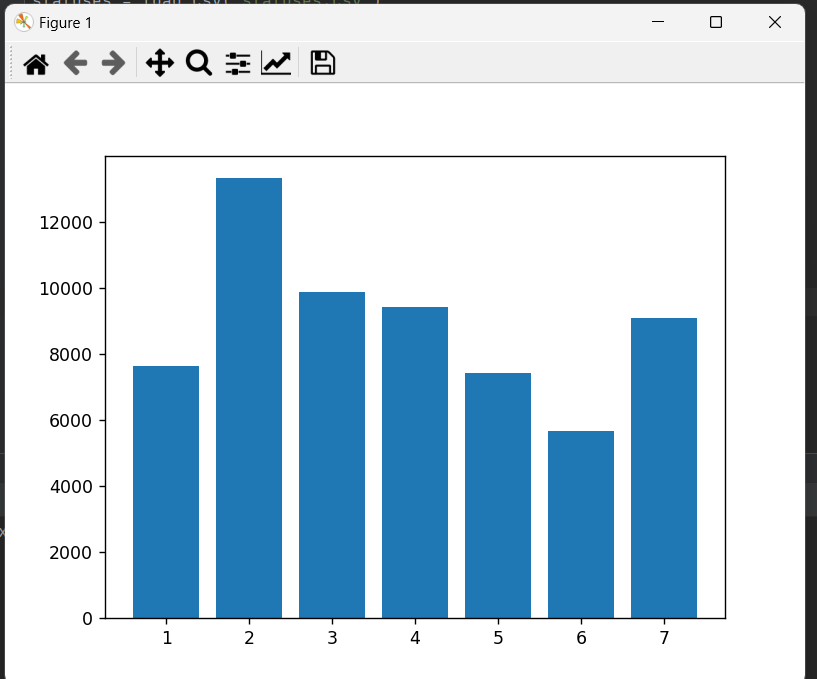

3.2. (уровень сложности: средний)

Как по времени суток распределяется активность студентов?

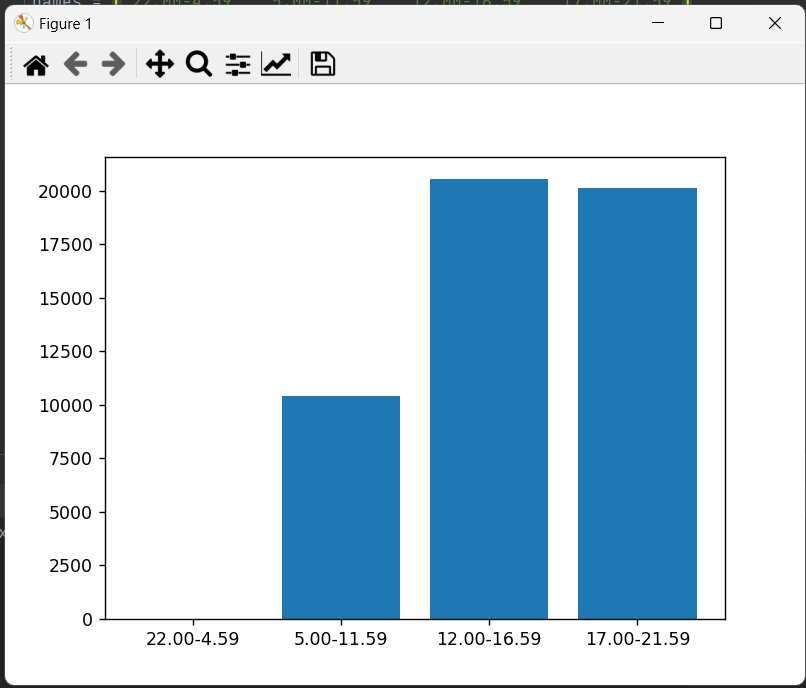